In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
cd /content/drive/MyDrive/AiData

/content/drive/MyDrive/AiData


In [3]:
!pip install treelib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import  Counter, OrderedDict
import treelib
from treelib import Tree, Node

In [5]:
Data = pd.read_csv('coursework2.csv')
print(Data)

     instant      dteday  season  yr  ...  windspeed  casual  registered  count
0          1  01/01/2011       1   0  ...       0.16     331         654    985
1          2  02/01/2011       1   0  ...       0.25     131         670    801
2          3  03/01/2011       1   0  ...       0.25     120        1229   1349
3          4  04/01/2011       1   0  ...       0.16     108        1454   1562
4          5  05/01/2011       1   0  ...       0.19      82        1518   1600
..       ...         ...     ...  ..  ...        ...     ...         ...    ...
726      727  27/12/2012       1   1  ...       0.35     247        1867   2114
727      728  28/12/2012       1   1  ...       0.16     644        2451   3095
728      729  29/12/2012       1   1  ...       0.12     159        1182   1341
729      730  30/12/2012       1   1  ...       0.35     364        1432   1796
730      731  31/12/2012       1   1  ...       0.15     439        2290   2729

[731 rows x 16 columns]


In [6]:
df = pd.DataFrame(Data)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,0.81,0.16,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,0.70,0.25,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,0.44,0.25,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,0.59,0.16,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,0.44,0.19,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,10.42,11.33,0.65,0.35,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.39,12.75,0.59,0.16,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.39,12.12,0.75,0.12,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.49,11.58,0.48,0.35,364,1432,1796


In [7]:
data = Data.values
print(data.shape)

(731, 16)


In [8]:
count_data = data[:, 15]

[22.0 2919.3333333333335 5816.666666666667 8714.0]


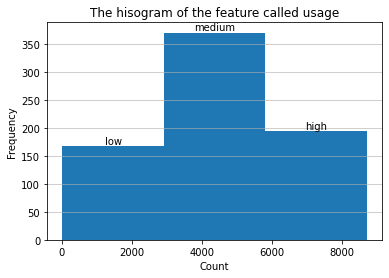

In [9]:
counts, bins = np.histogram(count_data, bins = 3)
plt.hist(bins[:-1], bins, weights=counts)
plt.text((bins[0]+bins[1])/2 + 1, counts[0]+1,'low', ha='center',va='bottom')
plt.text((bins[1]+bins[2])/2 + 1, counts[1]+1,'medium', ha='center',va='bottom')
plt.text((bins[2]+bins[3])/2 + 1, counts[2]+1,'high', ha='center',va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('The hisogram of the feature called usage')
print(bins)

In [10]:
usage = []
for i, c in enumerate(count_data):
  if count_data[i]>=bins[0] and count_data[i]<bins[1]:
    usage.append(0)
  elif count_data[i]>=bins[1] and count_data[i]<bins[2]:
    usage.append(1)
  else:
    usage.append(2)
print(usage)
usage = np.array(usage).reshape(-1, 1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 

In [11]:
# new_data = np.hstack((data[:,0:15], usage))
new_data = np.hstack((data[:,2].reshape(-1,1),data[:,7].reshape(-1,1),  data[:,8].reshape(-1,1), usage.reshape(-1,1)))

In [12]:
new_data

array([[1, 0, 2, 0],
       [1, 0, 2, 0],
       [1, 1, 1, 0],
       ...,
       [1, 0, 2, 0],
       [1, 0, 1, 0],
       [1, 1, 2, 0]], dtype=object)

In [13]:
features = ['season','workingday', 'weathersit', 'usage']
new_df = pd.DataFrame(new_data, columns=features)
new_df

,season,workingday,weathersit,usage
0,1,0,2,0
1,1,0,2,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
726,1,1,2,0
727,1,1,2,1
728,1,0,2,0
729,1,0,1,0


In [14]:
info = {'season':{'1':{'workingday':{'1':100}}, '2': {'workingday':{'0':0}}}}

In [15]:
info['season']['1']['workingday']['1'] = 2
info

{'season': {'1': {'workingday': {'1': 2}}, '2': {'workingday': {'0': 0}}}}

In [16]:
c_season = Counter(new_data[:, 0]).items()
c_workingday = Counter(new_data[:, 1]).items()
c_weathersit = Counter(new_data[:, 2]).items()
print('counter season:', c_season)
print('counter workinday:', c_workingday)
print('counter weathersit:', c_weathersit)

counter season: dict_items([(1, 181), (2, 184), (3, 188), (4, 178)])
counter workinday: dict_items([(0, 231), (1, 500)])
counter weathersit: dict_items([(2, 247), (1, 463), (3, 21)])


In [17]:
c_season = np.array(list(c_season))[:, 1]
c_workingday = np.array(list(c_workingday))[:, 1]
c_weathersit = np.array(list(c_weathersit))[:, 1]
print('counter season:', c_season)
print('counter workinday:', c_workingday)
print('counter weathersit:', c_weathersit)

counter season: [181 184 188 178]
counter workinday: [231 500]
counter weathersit: [247 463  21]


In [18]:
# def entropy(P):
#   H = -(P * np.log2(P)).sum()  #calculating entropy
#   return H

In [19]:
# def class_dist(data):  #get all the labels of the features and target value, the probability distribution for each class
#   size = data.shape[1]  #the counting number of each class
#   dist = [] #distribution list
#   labels = [] #class list
#   ct = [] #list of counting number
#   for i in range(size):
#       c = np.array(list((Counter(data[:, i]).items())))  #counting number for each class, return the counting number and class names
#       labels.append(list(c[:,0]))  
#       ct.append(list(c[:, 1]))
#       p = c[:, 1]/c[:,1].sum() # calculating the probability distribution 
#       dist.append(list(p)) 
#   return labels, dist, ct


In [20]:
# def Reminder(label, p, data, target):  #get reminder of the data, lable is the class name of the data, p is the probability distribution
#   reminder = []                #for each class--the weight of each class, data is the feature matrix, target is the target value verctor
  
#   for i in range(len(label)): # iteration for each feature
#       rem = 0
#       for j in range(len(label[i])): #iteration for each class of the feature
#           idx = np.where(data[:, i] == label[i][j])[0]  # find the index of each class/node in feature matrix
#           count_feat = target[idx].reshape(-1, 1)   #using the index to find the corresponding target value
#           lab, dist, c = class_dist(count_feat)  #calculating the probability distribution of each node according to the target value class
#           dist = dist[0]
#           H = entropy(dist)  # calculate the entropy for each node/children
#           rem = rem + H * p[i][j] # calculate the reminder weight times entropy for each node
#       reminder.append(rem) 
#   return reminder

In [21]:
FeatureName = np.array(['season', 'workingday', 'weathersit', 'usage'])

In [22]:
def ToDict(data, FeatureName):
    DataDict = dict()
    for num, name in enumerate(FeatureName):
      DataDict[name] = data[:, num]

    return DataDict

In [23]:
def ClassDist(DataDict):
    tree = dict()
    for name in DataDict.keys():
      tree[name] = {}
      items = np.array(list((Counter(DataDict[name]).items())))
      p = items[:,1]/items[:,1].sum()
      for num, item in enumerate(items):

        if name != 'usage':
          SeperatedIdx = np.where(DataDict[name] == item[0])[0]
          # SeperatedData = DataDict['usage'][SeperatedIdx]
          tree[name][str(item[0])] = [item[1], p[num], SeperatedIdx]
        else:
          tree[name][str(item[0])] = [item[1], p[num]]
    return tree

In [24]:
def Entropy(Dict, FeatureName):
  H = 0
  for key, value in Dict[FeatureName].items():
      H = H - value[1] * np.log2(value[1])  #calculating entropy
  return H

In [25]:
def GainAndDict(DataDict): #get a dictionary with distribution, index, gain and entropy for each feature
    Parent = ClassDist(DataDict)  #get the distribution for each feature
    children_usage = dict()   # create dictionary for children node
    for key1 in Parent.keys():  # iteration of the feature
      if key1 != 'usage':
        children_usage[key1] = {} # create the node for each feature season, workingday and weatherset
        rem = 0
        for key2 in Parent[key1].keys():  #get the children node in each feature
            idx = np.where(DataDict[key1]==int(key2)) # find the index of each child in each feature
            divide = DataDict['usage'][idx].reshape(-1,1) #extract the usage data using the index of each child
            todict = ToDict(divide, ['usage']) # transfrom into dictionary
            dist = ClassDist(todict) # get the distribution of the usage data of each child node
            H = Entropy(dist, 'usage')  # get the entropy for each child node
            children_usage[key1][key2] = dist #transfrom the data into dictionary
            children_usage[key1][key2]['index'] = Parent[key1][key2][2]
            children_usage[key1][key2]['H'] = H
            rem = rem + H * Parent[key1][key2][1] #get the reminder
        gain = Entropy(Parent, 'usage') - rem      #get the gain
        children_usage[key1]['gain'] = gain
    return children_usage

In [26]:
def FindFeatureAndSubDict(DataDict):
    updated_dict = GainAndDict(DataDict)#get a dictionary with distribution, index, gain and entropy for each feature
    max_gain = 0 #initialize the maximal gain
    sub_dict = dict() #create subdictionary
    H = dict()
    G = dict()
    for key in updated_dict.keys():  # iterate the feature
        gain = updated_dict[key]['gain'] #get the gain
        max_gain = max(max_gain, gain) #find the maximal gain
        G[key] = gain
    find = list(filter(lambda k: updated_dict[k]['gain'] == max_gain, updated_dict))[0] #inverse index to find the feature name
    key_len = 0
    for k in updated_dict[find].keys():
      if k != 'gain':
        key_len = key_len + 1
    sub_dict[find] = {} #create dictionary with parent node the best feature found
    
    for key1 in updated_dict[find].keys(): #iterate the children of the features
      if key1 != 'gain': #do not include the gain
        sub_dict[find][key1] = {} #create the children of the features in subdictionary
        idx = updated_dict[find][key1]['index'] #get the index of the child node for best feature found
        H[key1] = updated_dict[find][key1]['H']
        for key2 in updated_dict.keys(): # iterate the feature
            if key2 != find and key_len>1: #do not include the best feature found
              # idx = updated_dict[find][key1]['index'] #get the index of the child node for best feature found
              sub_dict[find][key1][key2] = DataDict[key2][idx] #insert the data into the subdictionary
              sub_dict[find][key1]['usage'] = DataDict['usage'][idx] 
            else:
              sub_dict[find][key1]['usage'] = DataDict['usage'][idx] 
    return find, sub_dict, H, G

In [27]:
DataDict = ToDict(new_data, FeatureName)
feature, sub_dict, H, G = FindFeatureAndSubDict(DataDict)
print(feature)
print(H)
# print(G)
# print(sub_dict)
tree = dict()
tree[feature] = {}
for name in sub_dict[feature].keys():
  if H[name] != 0:
    tree[feature][name] = {}

season
{'1': 1.1346155843282024, '2': 1.4136016977102295, '3': 1.121927774598444, '4': 1.2893483023440586}


In [28]:
usage_name = ['low', 'medium', 'high']
for key in sub_dict[feature].keys():
  feature1, sub_dict1, H1, G1 = FindFeatureAndSubDict(sub_dict[feature][key])
  # print(feature1)
  # print(H1)
  # print('************')
  # print(G1)
  # print(sub_dict1[feature1])
  tree[feature][key][feature1] = {} 
  

  for K in sub_dict1[feature1].keys():
    tree[feature][key][feature1][K] = {} 
    if H1[K] != 0:
      # print(K, H1[K])

      feature2, sub_dict2, H2, G2 = FindFeatureAndSubDict(sub_dict1[feature1][K])
      tree[feature][key][feature1][K][feature2] = {} 
      # print(feature2)
      # print(H2)
      # print(sub_dict2[feature2])
      for k, v in sub_dict2[feature2].items():
        tree[feature][key][feature1][K][feature2][k] = {} 
        # print(k, v)
        cls = mode(v['usage'])[0][0]
        print(cls)
        cls_counts = ClassDist(v)['usage']
        # print(cls_counts)
        tree[feature][key][feature1][K][feature2][k]['usage'] = {} 
        tree[feature][key][feature1][K][feature2][k]['usage'][usage_name[cls]] = cls_counts
        # print(cls)
        # if H2[k] != 0:
          # print(k, H2[k])

0
0
0
0
0
0
1
1
1
2
1
1
2
1
0
1
1
1
1
1
0
0


In [29]:
tree

{'season': {'1': {'workingday': {'0': {'weathersit': {'1': {'usage': {'low': {'0': [30,
          0.7317073170731707],
         '1': [11, 0.2682926829268293]}}},
      '2': {'usage': {'low': {'0': [15, 0.7894736842105263],
         '1': [2, 0.10526315789473684],
         '2': [2, 0.10526315789473684]}}},
      '3': {'usage': {'low': {'0': [1, 1.0]}}}}},
    '1': {'weathersit': {'1': {'usage': {'low': {'0': [33, 0.4714285714285714],
         '1': [32, 0.45714285714285713],
         '2': [5, 0.07142857142857142]}}},
      '2': {'usage': {'low': {'0': [31, 0.6595744680851063],
         '1': [16, 0.3404255319148936]}}},
      '3': {'usage': {'low': {'0': [3, 1.0]}}}}}}},
  '2': {'weathersit': {'1': {'workingday': {'0': {'usage': {'high': {'0': [1,
          0.027777777777777776],
         '1': [16, 0.4444444444444444],
         '2': [19, 0.5277777777777778]}}},
      '1': {'usage': {'medium': {'0': [5, 0.06493506493506493],
         '1': [39, 0.5064935064935064],
         '2': [33, 0.42857

In [30]:
class Nodex(object): 
    def __init__(self, num): 
      self.num = num

In [31]:
i = 0
tree1 = Tree()
tree1.create_node('Root', 'root');
for child1 in tree.keys():
  for node1 in tree[child1].keys():
    i = i + 1
    N1 = child1+' '+'='+' '+node1
    C1 = 'child'+ str(i)
    tree1.create_node(N1, C1, parent = 'root');
    for child2 in tree[child1][node1].keys():
      for node2 in tree[child1][node1][child2].keys():
        i = i + 1
        N2 = child2+' '+'='+' '+node2
        C2 = 'child'+ str(i)
        tree1.create_node(N2, C2, parent = C1);
        for child3 in tree[child1][node1][child2][node2].keys():
          for node3 in tree[child1][node1][child2][node2][child3].keys():
            i = i + 1
            N3 = child3+' '+'='+' '+node3
            C3 = 'child'+ str(i)
            tree1.create_node(N3, C3, parent = C2);
            # print(tree[child1][node1][child2][node2][child3][node3].keys())
            for child4 in tree[child1][node1][child2][node2][child3][node3].keys():
              for node4 in tree[child1][node1][child2][node2][child3][node3][child4].keys():
                i = i + 1
                N4 = child4+' '+'='+' '+node4
                C4 = 'child'+ str(i)
                cls_data = tree[child1][node1][child2][node2][child3][node3][child4][node4]
                tree1.create_node(N4, C4, parent = C3, data = Nodex(['1', '1', '1']));
                

In [32]:
tree1.show()

Root
├── season = 1
│   ├── workingday = 0
│   │   ├── weathersit = 1
│   │   │   └── usage = low
│   │   ├── weathersit = 2
│   │   │   └── usage = low
│   │   └── weathersit = 3
│   │       └── usage = low
│   └── workingday = 1
│       ├── weathersit = 1
│       │   └── usage = low
│       ├── weathersit = 2
│       │   └── usage = low
│       └── weathersit = 3
│           └── usage = low
├── season = 2
│   ├── weathersit = 1
│   │   ├── workingday = 0
│   │   │   └── usage = high
│   │   └── workingday = 1
│   │       └── usage = medium
│   ├── weathersit = 2
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │       └── usage = medium
│   └── weathersit = 3
├── season = 3
│   ├── weathersit = 1
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │       └── usage = high
│   ├── weathersit = 2
│   │   ├── workingday = 0
│   │   │   └── usage = medium
│   │   └── workingday = 1
│   │       └── usage = medium

In [33]:
prune_example_data = tree['season']['1']['workingday']['0']['weathersit']
for pk, pv in prune_example_data.items():
  print(pk, pv['usage'])

2 {'low': {'0': [15, 0.7894736842105263], '1': [2, 0.10526315789473684], '2': [2, 0.10526315789473684]}}
1 {'low': {'0': [30, 0.7317073170731707], '1': [11, 0.2682926829268293]}}
3 {'low': {'0': [1, 1.0]}}


In [34]:
def mcp(k, c):
  return (k-c+1)/(k+2)

In [35]:
p = np.array([[30, 11, 0], [15, 2, 2], [1, 0, 0]])
p_max = []
for p_item in p:
  p_max.append(p_item.max())
all_p = p.sum()
p_row = p.sum(axis=1)
weight = p_row/all_p
print(p_row)
print(p_max)
MCP = mcp(p_row, p_max)
print(MCP)
BackUpError = (weight*MCP).sum()
ParentMcp = mcp(61, 46)
print(ParentMcp)
print(BackUpError)
print(ParentMcp<BackUpError)

[41 19  1]
[30, 15, 1]
[0.27906977 0.23809524 0.33333333]
0.25396825396825395
0.26719677577473994
True


In [36]:
# da = sub_dict['1']
# parent = ClassDist(sub_dict['1'])
# updated_dict1 = GainAndDict(parent,da)
# max_gain = 0
# sub_dict = dict()
# for key in updated_dict1.keys():
#     gain = updated_dict1[key]['gain']
#     max_gain = max(max_gain, gain)
# find = list(filter(lambda k: updated_dict1[k]['gain'] == max_gain, updated_dict1))[0]
# find

In [37]:
# dct = {'a': 0, 'b': 1, 'c': 2}
# value = 1
# xx = list(filter(lambda k: dct[k] == value, dct))
# print(xx)

In [38]:
# def Gain(data, target):
#     target_label, target_p, target_c = class_dist(target) #get the distribution of the parent data
#     target_entropy = entropy(target_p)# entropy of the parent
#     label, p, c = class_dist(data)
#     reminder_all = Reminder(label,p, data, target)
#     G = target_entropy - reminder_all #get the gain
#     return G


In [39]:
# feature_data = new_data[:, :3]
# result = new_data[:, 3].reshape(-1,1)
# gain = Gain(feature_data, result)
# feature = np.where(gain==max(gain))[0][0]
# print(feature)
# print(gain)

In [40]:
# def children_node(feature, target, node, feature_name):
#     Gains_children = []
#     name = [feature_name[node]]
#     deleted_name = np.delete(feature_name, node, axis=0)
#     labels, p, c = class_dist(feature)
#     label = labels[node]
#     f_label, f_disr, f_ct = class_dist(feature[:, node].reshape(-1, 1))
#     for la in label:
#       f_idx = np.where(feature[:,node] == la)[0]
#       f_data = np.delete(feature[f_idx,:], node, axis=1)
#       f_result = result[f_idx]
#       g = Gain(f_data, f_result)
#       name.append(deleted_name[np.where(g==max(g))[0]][0])
#       Gains_children.append(g.tolist())
#     print(name)
    
#     return np.array(Gains_children)



In [41]:
# feature_names = np.array(['season', 'workinday', 'weathersit'])
# children_node(feature_data, result, feature, feature_names)

In [42]:
# f1_label, f1_disr, f1_ct = class_dist(feature_data[:, 0].reshape(-1, 1))
# f1_label[0]
# f1_idx = np.where(feature_data[:,0] == 1)[0]
# f1_data = feature_data[f1_idx, 1:3]
# f1_result = result[f1_idx]
# gain2 = Gain(f1_data, f1_result)
# print(gain2)

In [43]:
# label, p, c = class_dist(feature_data)
# print('class:', label)
# print('p:', p)